# Imports

In [1]:
import geopandas as gpd
import pandas as pd
import descartes
import json

from bokeh.io import output_notebook,show,reset_output,output_file,save
import bokeh
from bokeh.io.doc import curdoc
from bokeh.plotting import figure
output_notebook()


import matplotlib.pyplot as plt
import shapely
from shapely.geometry import Point, Polygon
import re


Loading BokehJS ...

## Restaurant data df_rest

In [ ]:
# df_rest = pd.read_csv('Restaurants_in_LA.csv')
# df_rest.dropna(subset=['LOCATION'],inplace=True)

In [ ]:
# df_rest.to_csv('Rest_geom.csv',index=False)

In [2]:
df_rest = pd.read_csv('Rest_geom.csv')
df_rest

,LOCATION ACCOUNT #,BUSINESS NAME,DBA NAME,STREET ADDRESS,CITY,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,MAILING ZIP CODE,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION END DATE,LOCATION,GEOMETRY
0,0003069436-0001-7,TRAKTIR GROUP INC,TRAKTIR RESTAURANT,18588 VENTURA BLVD,TARZANA,18588 VENTURA 91356-4146,112 N HAMILTON DRIVE UNIT #207,BEVERLY HILLS,90211-2280,722110,Full-service restaurants,3,08/08/2018,NaN,"(34.1694, -118.5383)",POINT (34.1694 -118.5383)
1,0000410578-0001-0,DOUBLE O TWO INC,INTERNATIONAL HOUSE OF PANCAKES #2,8555 VESPER AVENUE,PANORAMA CITY,8555 VESPER 91402-2914,24801 PICO CANYON ROAD #200,STEVENSON RANCH,91381-1762,722110,Full-service restaurants,6,08/02/1982,NaN,"(34.2253, -118.4502)",POINT (34.2253 -118.4502)
2,0002815295-0001-6,MANNA LA LLC,PANERA BREAD,8647 S SEPULVEDA BLVD,WESTCHESTER,8647 SEPULVEDA 90045-4001,2339 11TH STREET,ENCINITAS,92024-6604,722110,Full-service restaurants,11,03/15/2015,NaN,"(33.9592, -118.3963)",POINT (33.9592 -118.3963)
3,0002537656-0014-1,CALIFORNIA FOOD MANAGEMENT LLC,BURGER KING 11024 | CALIFORNIA FOOD MANAGEMENT,5609 W SUNSET BLVD,LOS ANGELES,5609 SUNSET 90028-8534,8306 WILSHIRE BLVD SUITE #5002,BEVERLY HILLS,90211-2304,722110,Full-service restaurants,13,01/03/2011,NaN,"(34.098, -118.3117)",POINT (34.098 -118.3117)
4,0002798053-0001-3,CHARCOAL VENICE PARTNERS LLC,CHARCOAL VENICE,425 WASHINGTON BLVD,VENICE,425 WASHINGTON 90292-5213,425 WASHINGTON BLVD,VENICE,90292-5213,722110,Full-service restaurants,11,01/18/2015,NaN,"(33.9815, -118.4627)",POINT (33.9815 -118.4627)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,0002683382-0005-9,"APELILA AND J, LLC",NaN,1313 SEPULVEDA BLVD SUITE #1,TORRANCE,1313 SEPULVEDA 90501-5002,21700 COPLEY DRIVE SUITE #320,DIAMOND BAR,91765-5499,722110,Full-service restaurants,15,07/08/2018,NaN,"(33.8154, -118.3004)",POINT (33.8154 -118.3004)
6948,0002828440-0001-0,ATJ&B LLC,NaN,3500 WILSHIRE BLVD UNIT #101,LOS ANGELES,3500 WILSHIRE 90010-2326,716 CORPORATE CENTER DRIVE,POMONA,91768-2652,722110,Full-service restaurants,10,12/01/2014,NaN,"(34.0617, -118.3003)",POINT (34.0617 -118.3003)
6949,0000107548-0002-5,FRANCISCO J MEJIA,TAMALES ALBERTO ECHO PARK,1630 W SUNSET BLVD,LOS ANGELES,1630 SUNSET 90026-4227,NaN,NaN,NaN,722110,Full-service restaurants,13,11/13/2018,NaN,"(34.0768, -118.2577)",POINT (34.0768 -118.2577)
6950,0002363457-0001-7,NOBU LA LLC,NOBU LA,903 N LA CIENEGA BLVD,LOS ANGELES,903 LA CIENEGA 90069-4709,40 W 57TH STREET SUITE #320,NEW YORK,10019-4034,722110,Full-service restaurants,5,03/05/2008,NaN,"(34.0875, -118.3764)",POINT (34.0875 -118.3764)


In [8]:
def prep_geometry(location):
    """
    """
    location = re.sub('[()]','',location)
    location = location.split(',')
    coord = [float(x) for x in location]
    geometry = Point(coord)
    
    return geometry

In [ ]:
# geo_list = df_rest.LOCATION.apply(prep_geometry)
# type(geo_list)

In [9]:
df_rest['GEOMETRY'] = df_rest.LOCATION.apply(prep_geometry)

## Geo data read

In [4]:
CA_map = gpd.read_file('data/CA_Counties_TIGER2016.shp')

In [5]:
CA_map.to_crs('epsg:4326',inplace=True)

In [ ]:
# geo_df.geometry

In [ ]:
# LA_map = CA_map[CA_map['NAME'] == 'Los Angeles']

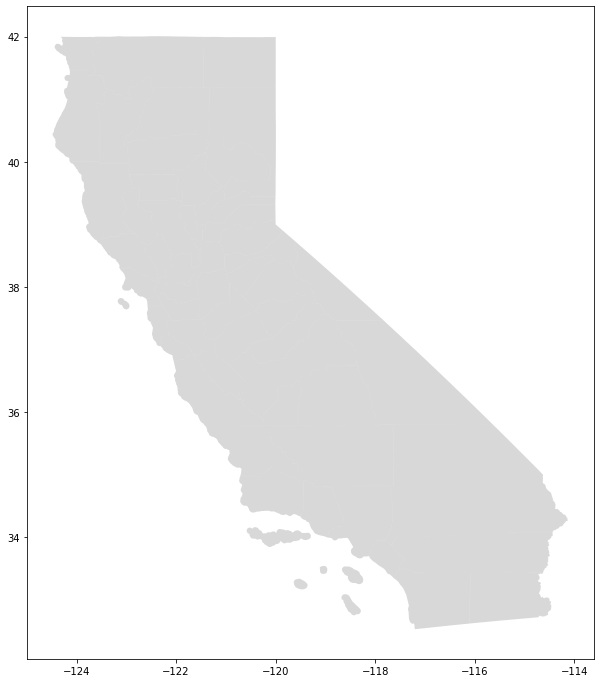

In [6]:
fig, ax = plt.subplots(figsize=(12,12))
CA_map.plot(color='gray',alpha=0.3,ax=ax)

plt.show()

In [17]:
crs = {'init': 'epsg:4326'}
geo_df = gpd.GeoDataFrame(df_rest,crs = crs,geometry = df_rest['GEOMETRY'])

/Users/ciro/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [16]:
## change X coordinate to y coord

# geo_df = geo_df[geo_df.geometry.notnull()]
# geo_df.geometry = geo_df.geometry.map(lambda polygon: shapely.ops.transform(lambda x, y: (y, x), polygon))

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
CA_map.plot(ax=ax,color='gray',alpha=0.3)
geo_df.geometry.plot(ax=ax,markersize=10,marker="o")
plt.xlim((-126,-112))
plt.ylim((32,43))


plt.show()

In [24]:
CA_geo = GeoJSONDataSource(geojson = CA_map.to_json())
# Rest_geo = GeoJSONDataSource(geojson = r_df.to_json())  ###NOT NEEDED ANYMORE

In [ ]:
# def prep_coord(location):
#     """
#     """
#     location = re.sub('[()]','',location)
#     location = location.split(',')
#     coord = [float(x) for x in location]
#     x_coord= coord[1]
#     y_coord = coord[0]
    
#     return x_coord

In [19]:
from bokeh.models import HoverTool, ColumnDataSource,GeoJSONDataSource,Slider,LinearColorMapper
from bokeh.layouts import column,row,WidgetBox



In [23]:
## creating a X and Y columns for plotting


# geo_df['x'] = [geometry.x for geometry in geo_df['geometry']]
# geo_df['y'] = [geometry.y for geometry in geo_df['geometry']]
# r_df = geo_df.drop('geometry',axis=1).copy()
# # rest_sources = ColumnDataSource(r_df)


In [25]:
# DROPPING COLS

# r_df = r_df.drop('GEOMETRY',axis=1).copy()

## READ df with x and y coord

In [ ]:
# r_df.rename(columns={"DBA NAME":"DBA_NAME"},inplace=True)
# r_df.to_csv('rest_geo_xy.csv',index=False)


r_df = pd.read_csv('rest_geo_xy.csv',)

In [21]:
m = figure(plot_height = 600,plot_width = 600,
          toolbar_location = 'below',
           tools = "pan,wheel_zoom,box_zoom,reset",x_range=(-125,-114), y_range=(32,43))
state = m.patches('xs','ys',source=CA_geo,fill_color='lightgray',line_color='black')
rest = m.circle('x','y',source=r_df,color='blue',alpha=0.3,size=5)
m.add_tools(HoverTool(renderers=[rest],
                         tooltips = [("Name","@DBA_NAME")]))


# output_file('test_LA-rest_map.html',mode='inline')
# save(m)
# show(p)

In [ ]:
type(m)

In [22]:
# output_file('test_LA-rest_map.html',mode='inline')
save(m,filename='test_map.html')

/Users/ciro/anaconda3/lib/python3.7/site-packages/bokeh/io/saving.py:126: UserWarning: save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN
  warn("save() called but no resources were supplied and output_file(...) was never called, defaulting to resources.CDN")
/Users/ciro/anaconda3/lib/python3.7/site-packages/bokeh/io/saving.py:139: UserWarning: save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'
  warn("save() called but no title was supplied and output_file(...) was never called, using default title 'Bokeh Plot'")


'/Users/ciro/repos/Businesses-Opt/test_map.html'

In [26]:
r_df

,LOCATION ACCOUNT #,BUSINESS NAME,DBA_NAME,STREET ADDRESS,CITY,LOCATION DESCRIPTION,MAILING ADDRESS,MAILING CITY,MAILING ZIP CODE,NAICS,PRIMARY NAICS DESCRIPTION,COUNCIL DISTRICT,LOCATION START DATE,LOCATION END DATE,LOCATION,GEOMETRY,x,y
0,0003069436-0001-7,TRAKTIR GROUP INC,TRAKTIR RESTAURANT,18588 VENTURA BLVD,TARZANA,18588 VENTURA 91356-4146,112 N HAMILTON DRIVE UNIT #207,BEVERLY HILLS,90211-2280,722110,Full-service restaurants,3,08/08/2018,NaN,"(34.1694, -118.5383)",POINT (34.1694 -118.5383),-118.5383,34.1694
1,0000410578-0001-0,DOUBLE O TWO INC,INTERNATIONAL HOUSE OF PANCAKES #2,8555 VESPER AVENUE,PANORAMA CITY,8555 VESPER 91402-2914,24801 PICO CANYON ROAD #200,STEVENSON RANCH,91381-1762,722110,Full-service restaurants,6,08/02/1982,NaN,"(34.2253, -118.4502)",POINT (34.2253 -118.4502),-118.4502,34.2253
2,0002815295-0001-6,MANNA LA LLC,PANERA BREAD,8647 S SEPULVEDA BLVD,WESTCHESTER,8647 SEPULVEDA 90045-4001,2339 11TH STREET,ENCINITAS,92024-6604,722110,Full-service restaurants,11,03/15/2015,NaN,"(33.9592, -118.3963)",POINT (33.9592 -118.3963),-118.3963,33.9592
3,0002537656-0014-1,CALIFORNIA FOOD MANAGEMENT LLC,BURGER KING 11024 | CALIFORNIA FOOD MANAGEMENT,5609 W SUNSET BLVD,LOS ANGELES,5609 SUNSET 90028-8534,8306 WILSHIRE BLVD SUITE #5002,BEVERLY HILLS,90211-2304,722110,Full-service restaurants,13,01/03/2011,NaN,"(34.098, -118.3117)",POINT (34.098 -118.3117),-118.3117,34.0980
4,0002798053-0001-3,CHARCOAL VENICE PARTNERS LLC,CHARCOAL VENICE,425 WASHINGTON BLVD,VENICE,425 WASHINGTON 90292-5213,425 WASHINGTON BLVD,VENICE,90292-5213,722110,Full-service restaurants,11,01/18/2015,NaN,"(33.9815, -118.4627)",POINT (33.9815 -118.4627),-118.4627,33.9815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,0002683382-0005-9,"APELILA AND J, LLC",NaN,1313 SEPULVEDA BLVD SUITE #1,TORRANCE,1313 SEPULVEDA 90501-5002,21700 COPLEY DRIVE SUITE #320,DIAMOND BAR,91765-5499,722110,Full-service restaurants,15,07/08/2018,NaN,"(33.8154, -118.3004)",POINT (33.8154 -118.3004),-118.3004,33.8154
6948,0002828440-0001-0,ATJ&B LLC,NaN,3500 WILSHIRE BLVD UNIT #101,LOS ANGELES,3500 WILSHIRE 90010-2326,716 CORPORATE CENTER DRIVE,POMONA,91768-2652,722110,Full-service restaurants,10,12/01/2014,NaN,"(34.0617, -118.3003)",POINT (34.0617 -118.3003),-118.3003,34.0617
6949,0000107548-0002-5,FRANCISCO J MEJIA,TAMALES ALBERTO ECHO PARK,1630 W SUNSET BLVD,LOS ANGELES,1630 SUNSET 90026-4227,NaN,NaN,NaN,722110,Full-service restaurants,13,11/13/2018,NaN,"(34.0768, -118.2577)",POINT (34.0768 -118.2577),-118.2577,34.0768
6950,0002363457-0001-7,NOBU LA LLC,NOBU LA,903 N LA CIENEGA BLVD,LOS ANGELES,903 LA CIENEGA 90069-4709,40 W 57TH STREET SUITE #320,NEW YORK,10019-4034,722110,Full-service restaurants,5,03/05/2008,NaN,"(34.0875, -118.3764)",POINT (34.0875 -118.3764),-118.3764,34.0875
